In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
# matplotlib 의 기본 scheme 말고 seaborn scheme 로 세팅
# graph 의 font size 를 seabron 의 font_sclae 을 사용하면 편함

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 전체 프로세스

1. 데이터셋 확인
    - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다.
    
    - 이를 확인하고, 향후 수정합니다.

<br>

2. 탐색적 데이터 분석(exploratory data analysis) 
    - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight 를 얻습니다.

<br>

3. feature engineering
    - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다.
    - one-hot encoding, class 로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.

<br>

4. model 만들기
    - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 
    - 물론 딥러닝을 위해 tensorlfow, pytorch 등을 사용할 수 도 있습니다.

<br>

5. 모델 학습 및 예측
    - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.
    
<br>
    
6. 모델 평가
    - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

## 1. Dataset 확인
- 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화되어 있으며, 많이 쓰이는 라이브러리는 pandas 입니다.
- 우리는 pandas 를 사용하여 데이터셋의 간단한 통계적 분석부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있습니다.
- 파이썬으로 데이터분석을 한다고 하면 반드시 능숙해져야 할 라이브러리이니, 여러 커널들을 공부하시면서 사용법에 익숙해지도록 반복 또 반복하시길 권장합니다.
- 캐글에서 데이터셋은 보통 train, testset 으로 나뉘어 있습니다.

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


우리가 다루는 문제에서 feature 는 Pclass, Age, SibSp, Parch, Fare 이며, 예측하려는 target label 은 Survived 입니다.

<table>
<thead><tr>
<th style="text-align:center">변수(feature, variable)</th>
<th style="text-align:center">정의</th>
<th style="text-align:center">설명</th>
<th style="text-align:center">타입</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">survival</td>
<td style="text-align:center">생존여부</td>
<td style="text-align:center">target label 임. 1, 0 으로 표현됨</td>
<td style="text-align:center">integer</td>
</tr>
<tr>
<td style="text-align:center">Pclass</td>
<td style="text-align:center">티켓의 클래스</td>
<td style="text-align:center">1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature</td>
<td style="text-align:center">integer </td>
</tr>
<tr>
<td style="text-align:center">sex</td>
<td style="text-align:center">성별</td>
<td style="text-align:center">male, female 로 구분되며 binary</td>
<td style="text-align:center">string</td>
</tr>
<tr>
<td style="text-align:center">Age</td>
<td style="text-align:center">나이</td>
<td style="text-align:center">continuous</td>
<td style="text-align:center">integer</td>
</tr>
<tr>
<td style="text-align:center">sibSp</td>
<td style="text-align:center">함께 탑승한 형제와 배우자의 수</td>
<td style="text-align:center">quantitative</td>
<td style="text-align:center">integer</td>
</tr>
<tr>
<td style="text-align:center">parch</td>
<td style="text-align:center">함께 탑승한 부모, 아이의 수</td>
<td style="text-align:center">quantitative</td>
<td style="text-align:center">integer</td>
</tr>
<tr>
<td style="text-align:center">ticket</td>
<td style="text-align:center">티켓 번호</td>
<td style="text-align:center">alphabat + integer</td>
<td style="text-align:center">string</td>
</tr>
<tr>
<td style="text-align:center">fare</td>
<td style="text-align:center">탑승료</td>
<td style="text-align:center">continuous</td>
<td style="text-align:center">float</td>
</tr>
<tr>
<td style="text-align:center">cabin</td>
<td style="text-align:center">객실 번호</td>
<td style="text-align:center">alphabat + integer</td>
<td style="text-align:center">string</td>
</tr>
<tr>
<td style="text-align:center">embared</td>
<td style="text-align:center">탑승 항구</td>
<td style="text-align:center">C = Cherbourg, Q = Queenstown, S = Southampton</td>
<td style="text-align:center">string</td>
</tr>
</tbody>
</table>

In [6]:
# pandas dataframe 에는 describe() 메소드가 있는데, 이를 쓰면 각 feature 가 가진 통계치들을 반환해줍니다.

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 테이블에서 보다시피, Passenger ID 숫자와 다른, 그러니까 null data 가 존재하년 feature 가 있는 것으로 보입니다.
- 이를 좀 더 보기 편하도록 그래프로 시각화해서 살펴봅시다.

### 1.1 Null data check

In [8]:
# {:>10} : 글자의 자릿수를 맞춰주는 것
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [10]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- Train, Test set 에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data 가 존재하는 것을 볼 수 있습니다.
- MANO 라이브러리를 사용하면 null data 의 존재를 보다 쉽게 시각화할 수 있습니다.

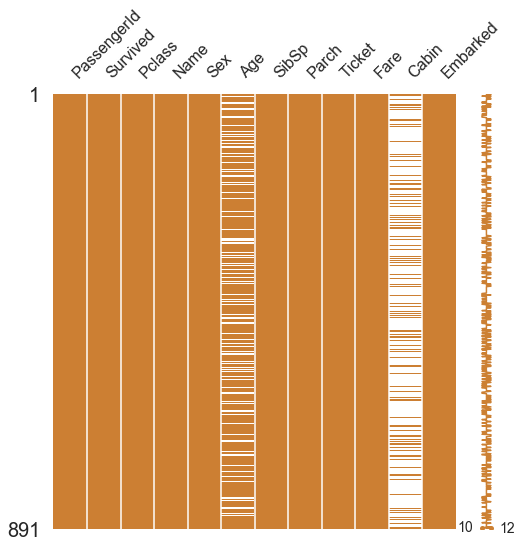

In [12]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color = (0.8, 0.5, 0.2))
plt.show()

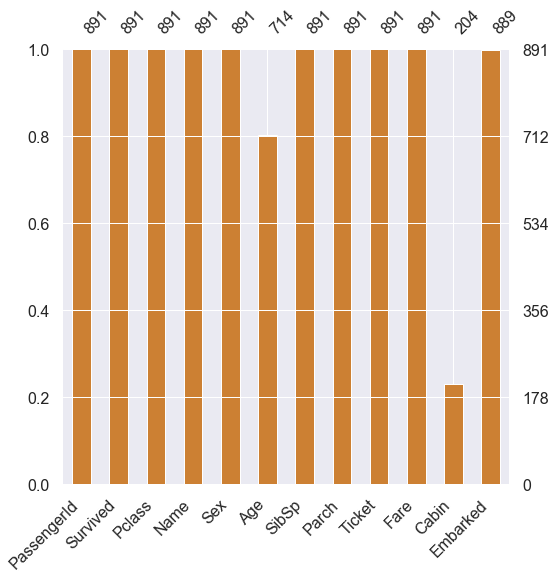

In [14]:
msno.bar(df=df_train.iloc[:, :], figsize= (8, 8), color=(0.8, 0.5, 0.2))
plt.show()

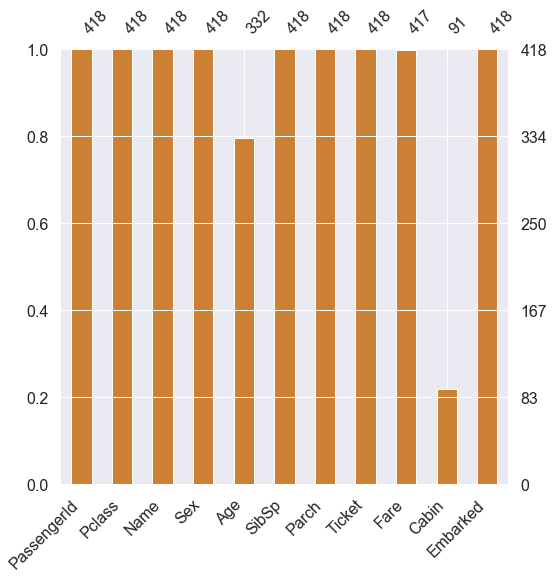

In [16]:
msno.bar(df=df_test.iloc[:, :], figsize = (8, 8), color=(0.8, 0.5, 0.2))
plt.show()

## 1.2 Target label 확인
- target label 이 어떤 distribution 을 가지고 있는지 확인해봐야 합니다.

<br>

- 지금 같은 binary classification 문제의 경우에서, 1 과 0 의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있습니다.

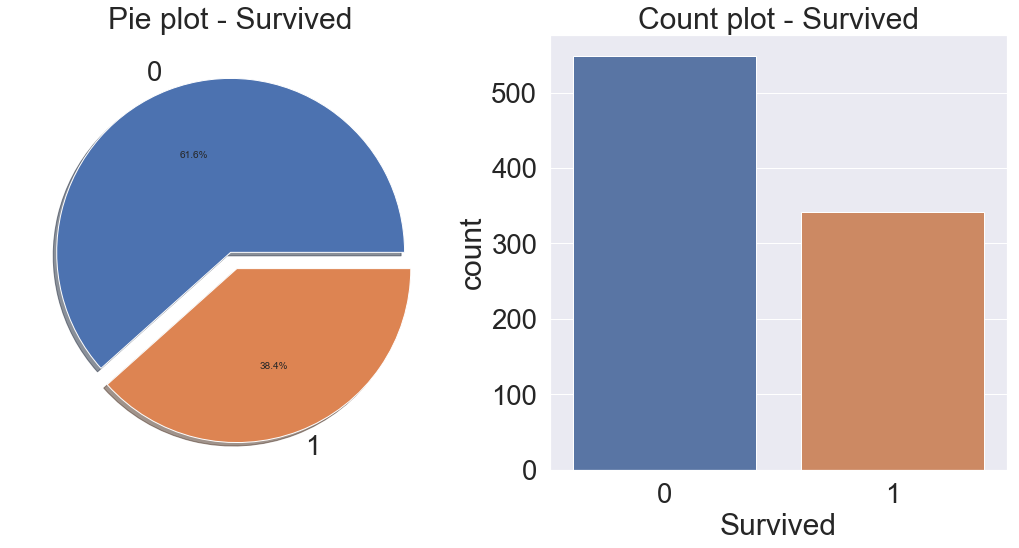

In [23]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# explode - 파이차트에서 각 파이마다 떨어지는 정도
# autopct - 파이차트에서 각 파이마다 수치표시 정도
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 38.4% 가 살아남았습니다.

<br>

- target label 의 부높가 제법 균일(balanced) 합니다. 불균일한 경우, 예를 들어서 100 중 1 이 99 개, 0 이 1 개 인 경우에는 만약 모델이 모든 것을 1 이라 해도 정확도가 99% 가 나오게 됩니다. 0 을 차즌ㄴ 문제라면 이 모델을 원하는 결과를 줄 수 없게 됩니다. 지금 문제에서는 그렇지 않으니 계속 진행하겠습니다.


## 2. Exploratory data analysis

- 이제 본격적으로 데이터 분석을 해보겠습니다. 데이터는 매우 많습니다. 이 많은 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요합니다.

<br>

- 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편합니다.

### 2.1 Pclass
- 먼저 Pclass 에 대해서 살펴보겠습니다. Pclass 는 ordinal, 서수형 데이터입니다. 카테고리이면서, 순서가 있는 데이터 타입입니다.

<br>

- 먼저 Pclass에 따른 생존율의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있습니다. 또한 pivot 이라는 메소드도 있습니다.

<br>

- 'Pclass', 'Survived' 를 가져온 후, Pclass 로 묶습니다. 그러고 나면 각 Pclass 마다 0, 1 이 count 가 되는데, 이를 평균내면 각 Pclass 별 생존율이 나옵니다.

<br>

- 아래와 같이 count() 를 하면, 각 class 에 몇 명이 있는 지 확인할 수 있으며, sum() 을 하면, 216 명 중 생존한 (sruvived=1) 사람의 총 합을 주게 됩니다.

In [29]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count() # default: True

,Survived
Pclass,
1,216
2,184
3,491


In [30]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- pandas 의 crosstab 을 사용하면 위 과정을 보기 쉽게 시각화할 수 있습니다.

In [31]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped 객체에 mean() 을 하게 되면, 각 클래스 별 생존율을 얻을 수 있습니다. class 1 이면 아래와 같습니다.
$$\frac{80}{(80 + 136)} \approx 0.63$$

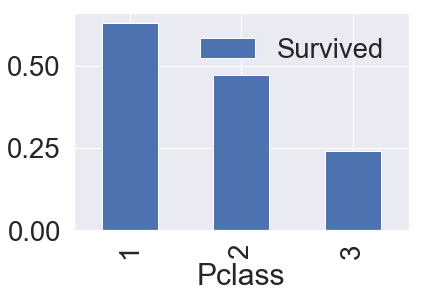

In [34]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
plt.show()

- 보다시피, Pclass 가 좋을 수록(1st) 생존율이 높은 것을 확인할 수 있습니다.
- 좀 더 보기 쉽게 그래프를 그려보겠습니다. seaborn 의 countplot 을 이용하면, 특정 label 에 따른 개수를 확인해 볼 수 있습니다.

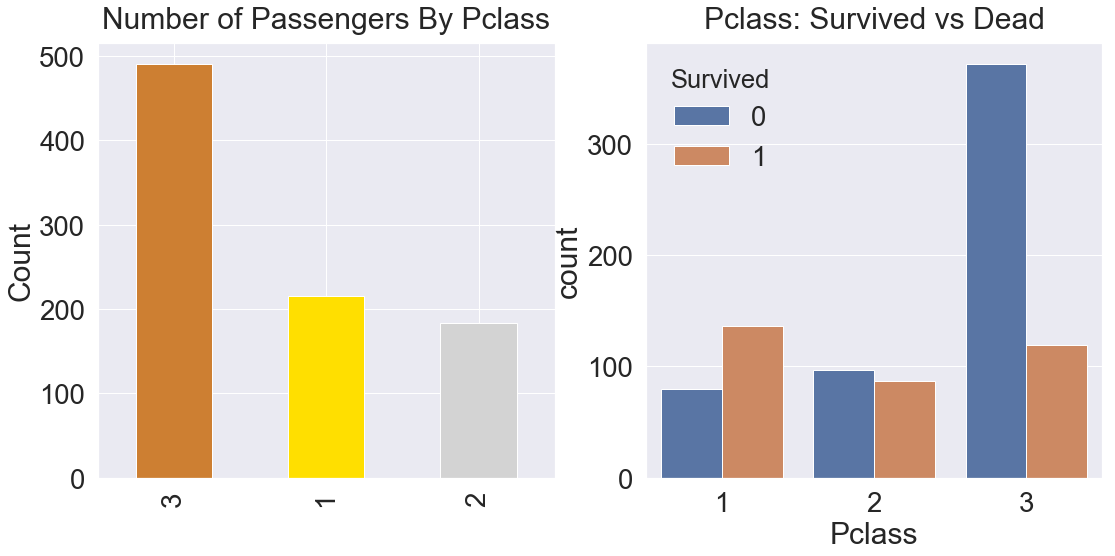

In [38]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])

ax[0].set_title('Number of Passengers By Pclass', y=y_position) # y 는 title 과 plot 사이의 거리
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 클리스가 높을 수록, 생존 확률이 높은 걸 확인할 수 있습니다.
- Pclass 1, 2, 3 순서대로 63%, 48%, 25% 입니다.

<br>

- 우리는 생존에 Pclass 가 큰 영향을 미친다고 생각해 볼 수 있으며, 나중에 모델을 세울 때 이 feature 를 사용하는 것이 좋을 것이라 판단할 수 있습니다.

### 2.2 Sex  

- 이번에는 성별로 생존율이 어떻게 달라지는 지 확인해보겠습니다.
- 마찬가지로 pandas groupby 와 seaborn countplot 을 사용해서 시각화해봅시다.

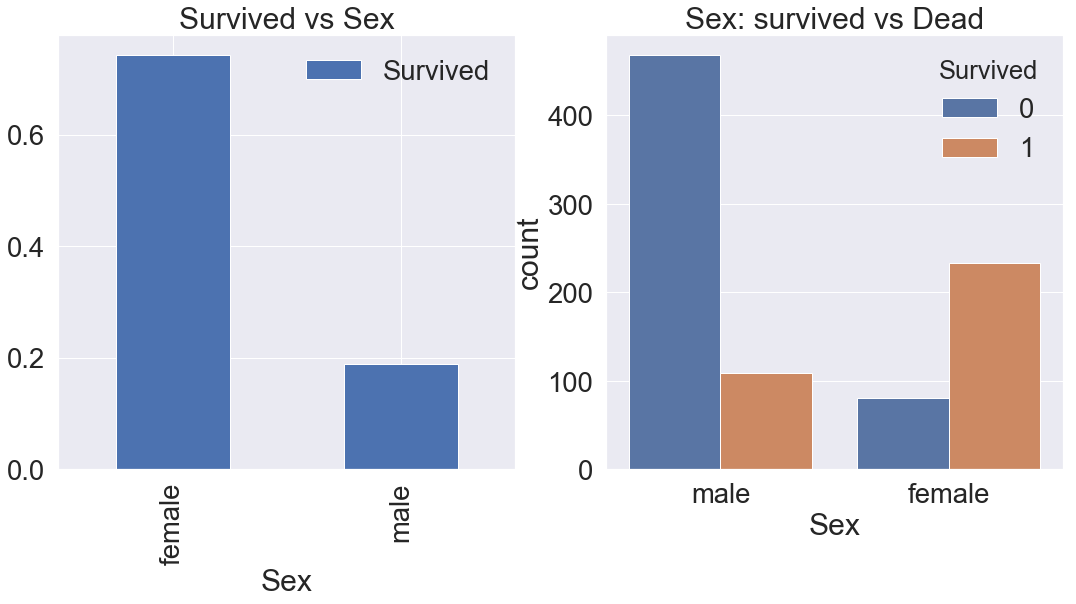

In [39]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: survived vs Dead')
plt.show()

- 보시다시피, 여자가 생존할 확률이 높습니다.

In [40]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by = 'Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [41]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass 와 마찬가지로, Sex 도 예측 모델에 쓰일 중요한 feature 임을 알 수 있습니다.

## 2.3 Both Sex and Pclass  
- 이번에는 Sex, Pclass 두 가지에 관하여 생존이 어떻게 달라지는 지 확인해 봅시다.
- seaborn 의 factorplot 을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

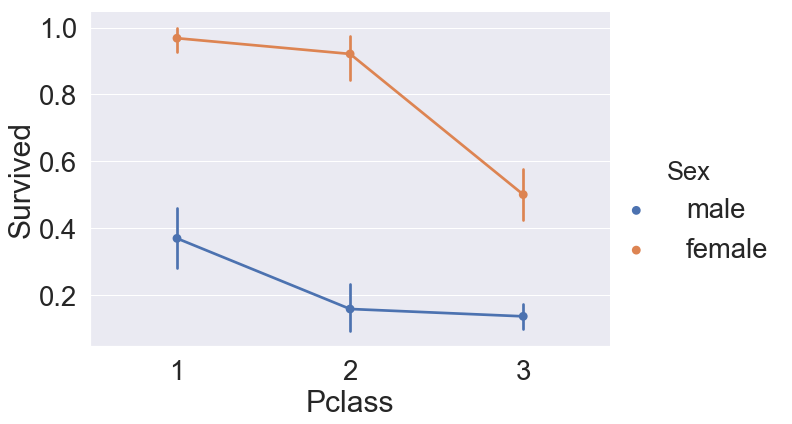

In [42]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)
plt.show()

- 모든 클래스에서 female 이 살 확률이 male 보다 높은 걸 알 수 있습니다.
- 또한 남자, 여자 상관없이 클래스가 높을수록 살 확률이 높습니다.
- 위 그래프는 hue 대신 column 으로 하면 아래와 같아집니다.

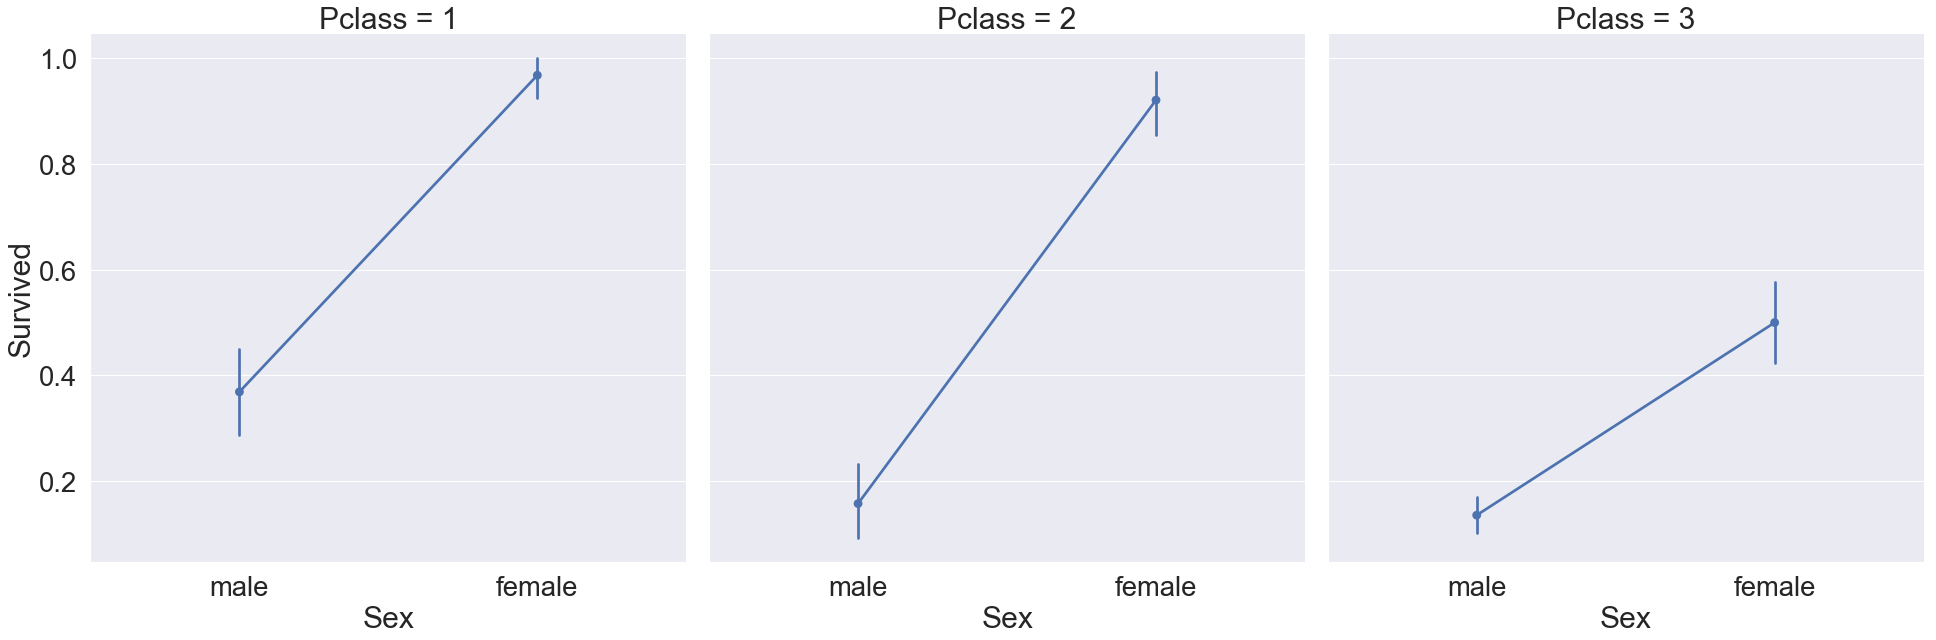

In [43]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)
plt.show()

### 2.4 Age
- 이번에는 Age feature 를 살펴봅시다.

In [44]:
print('제일 나이 많은 탑승객: {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


- 생존에 따른 Age 의 histogram 을 그려보겠습니다.

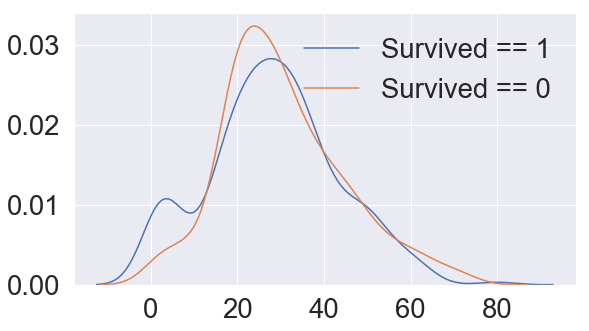

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 보시다시피, 생존자 중 나이가 어린 경우가 많음을 볼 수 있습니다.

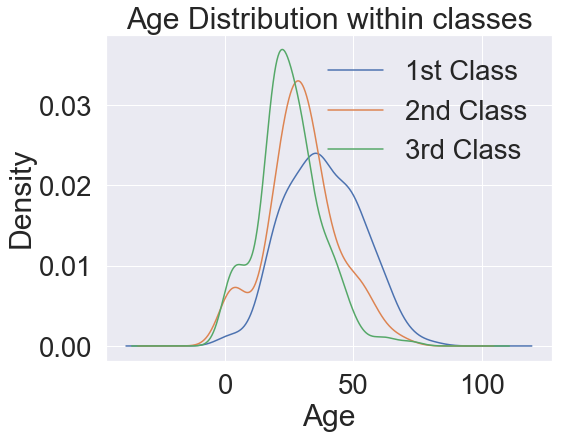

In [47]:
# Agedistribution withing classes

plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

- Class 가 높을 수록 나이 많은 사람의 비중이 커진다.
- 나잇대가 변하면서 생존율이 어떻게 되는 지 보려고 합니다.
나이범위를 점점 넓혀가며, 생존율이 어떻게 되는지 봅시다.

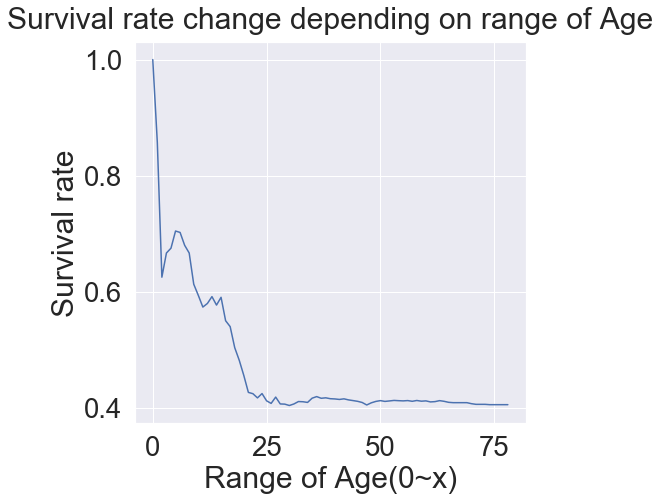

In [49]:
cummulate_survival_ratio = []

for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] <i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 보시다시피, 나이가 어릴 수록 생존율이 확실히 높은 것을 확인할 수 있습니다.
- 우리는 이 나이가 중요한 feature 로 쓰일 수 있음을 확인했습니다.

### 2.5 Pclass, Sex, Age

- 지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고싶습니다. 이를 쉽게 그려주는 것이 seaborn 의 violinplot 입니다.

<br>

- x 축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex) 를 나타내고, y 축은 보고 싶어하는 distribution(Age) 입니다.

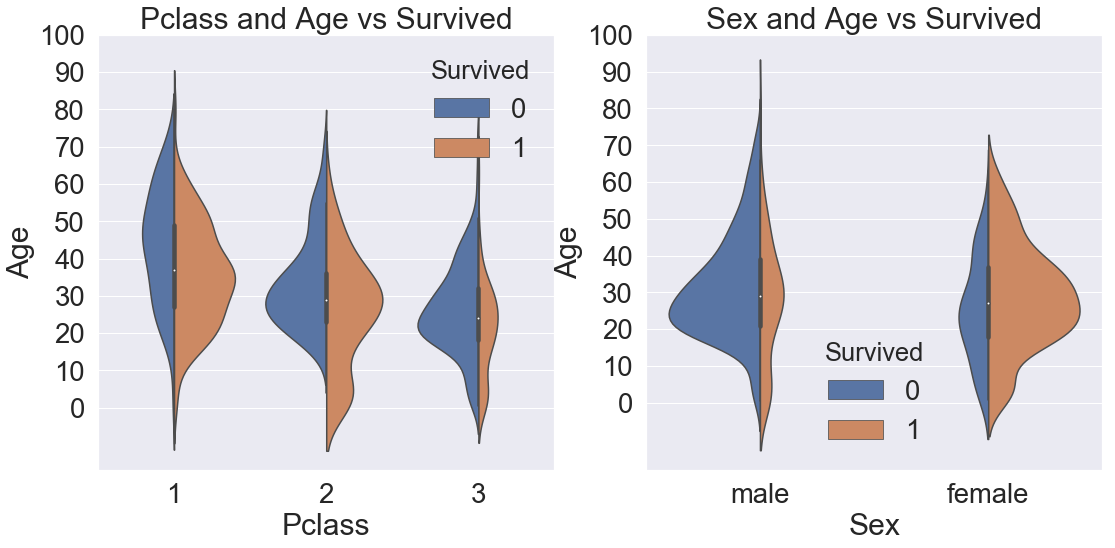

In [52]:
f, ax = plt.subplots(1, 2, figsize= (18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- 왼쪽 그림은 Pclass 별로 Age 의 distribution 이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프입니다.
- 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution 이 어떻게 다른지 보여주는 그래프입니다.
- 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한 것을 볼 수 있습니다.
- 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한 것을 볼 수 있습니다.
- 여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

### 2.6 Embarked
- Embarked 는 탑승한 항구를 나타냅니다.
- 위에서 해왔던 것과 비슷하게 탑승한 곳에 따른 생존율을 보겠습니다.

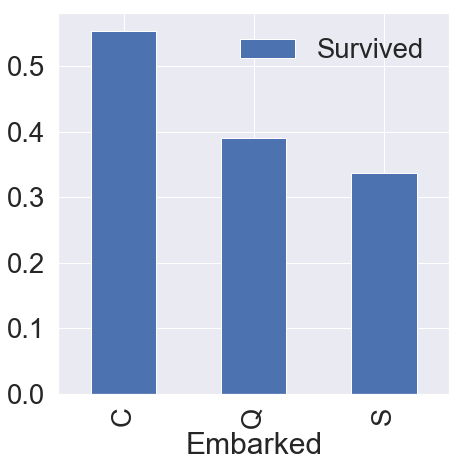

In [53]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax)
plt.show()

- 보시다시피, 조금의 차이는 있지만 생존율을 좀 비슷한 것 같습니다. 그래도 C 가 제일 높군요.
- 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용하겠습니다.
- 사실, 모델을 만들고 나면 우리가 사용한 feature 들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다. 이는 추후에 모델을 만들고 난 다음에 살펴볼 것입니다.
- 다른 feature 로 split 하여 한 번 살펴보겠습니다.

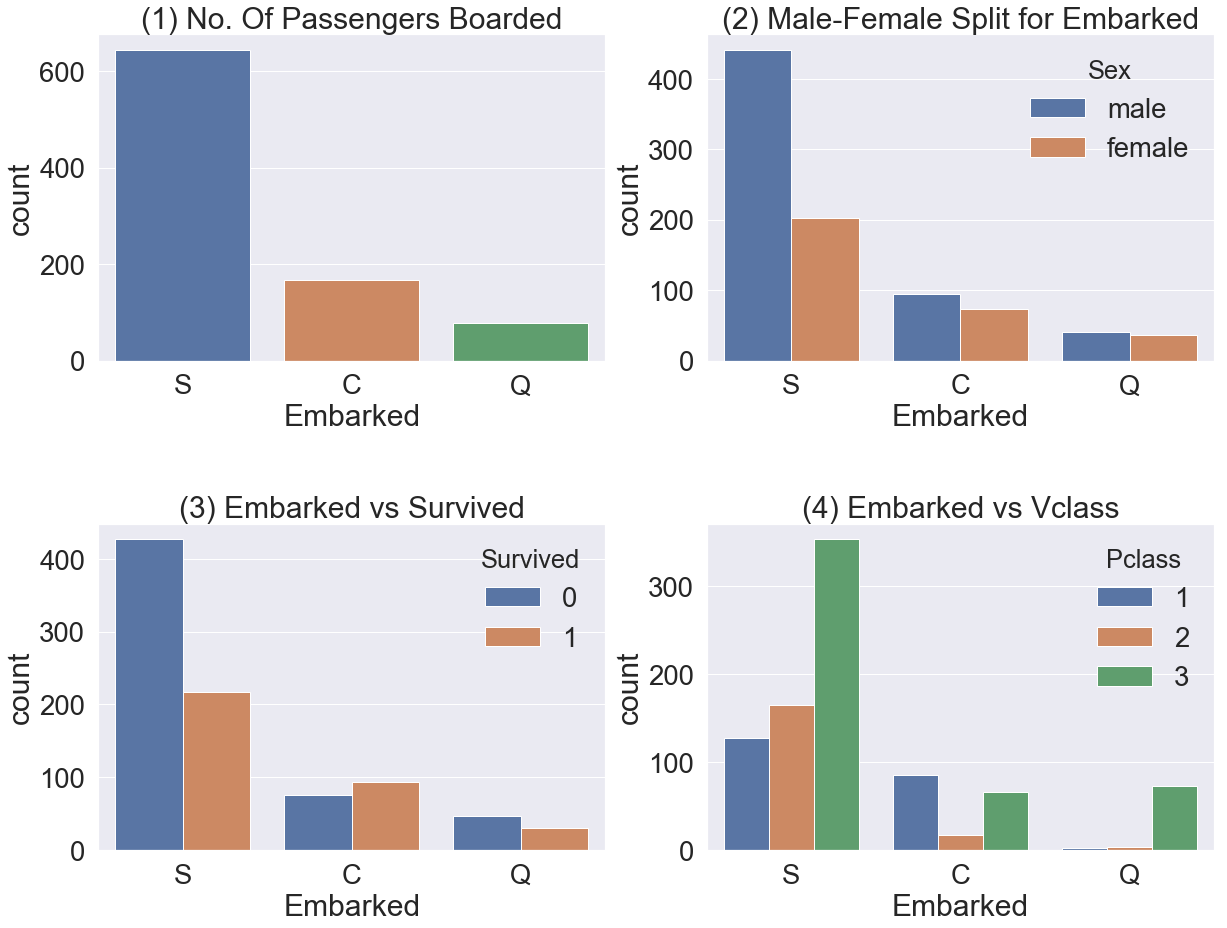

In [54]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Vclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했습니다.

<br>

- Figure(2) - C 와 Q 는 남녀의 비율이 비슷하고, S 는 남자가 더 많습니다.

<br>

- Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있습니다.

<br>

- Figure(4) - Class 로 Split 해서 보니, C 가 생존확률이 높은 건 클래스가 높은 사람이 많이 타서 그렇습니다. S 는 3rd class 가 많아서 생존확률이 낮게 나옵니다.

### 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)
- SibSp 와 parch 를 합하면 Family 가 될 것입니다. Family 로 합쳐서 분석해봅시다.

In [56]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 + 1
df_test['FamilySize'] = df_test['SibSp'] + df_train['Parch'] + 1

print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


- FamilySize 와 생존의 관계를 한 번 살펴봅시다.

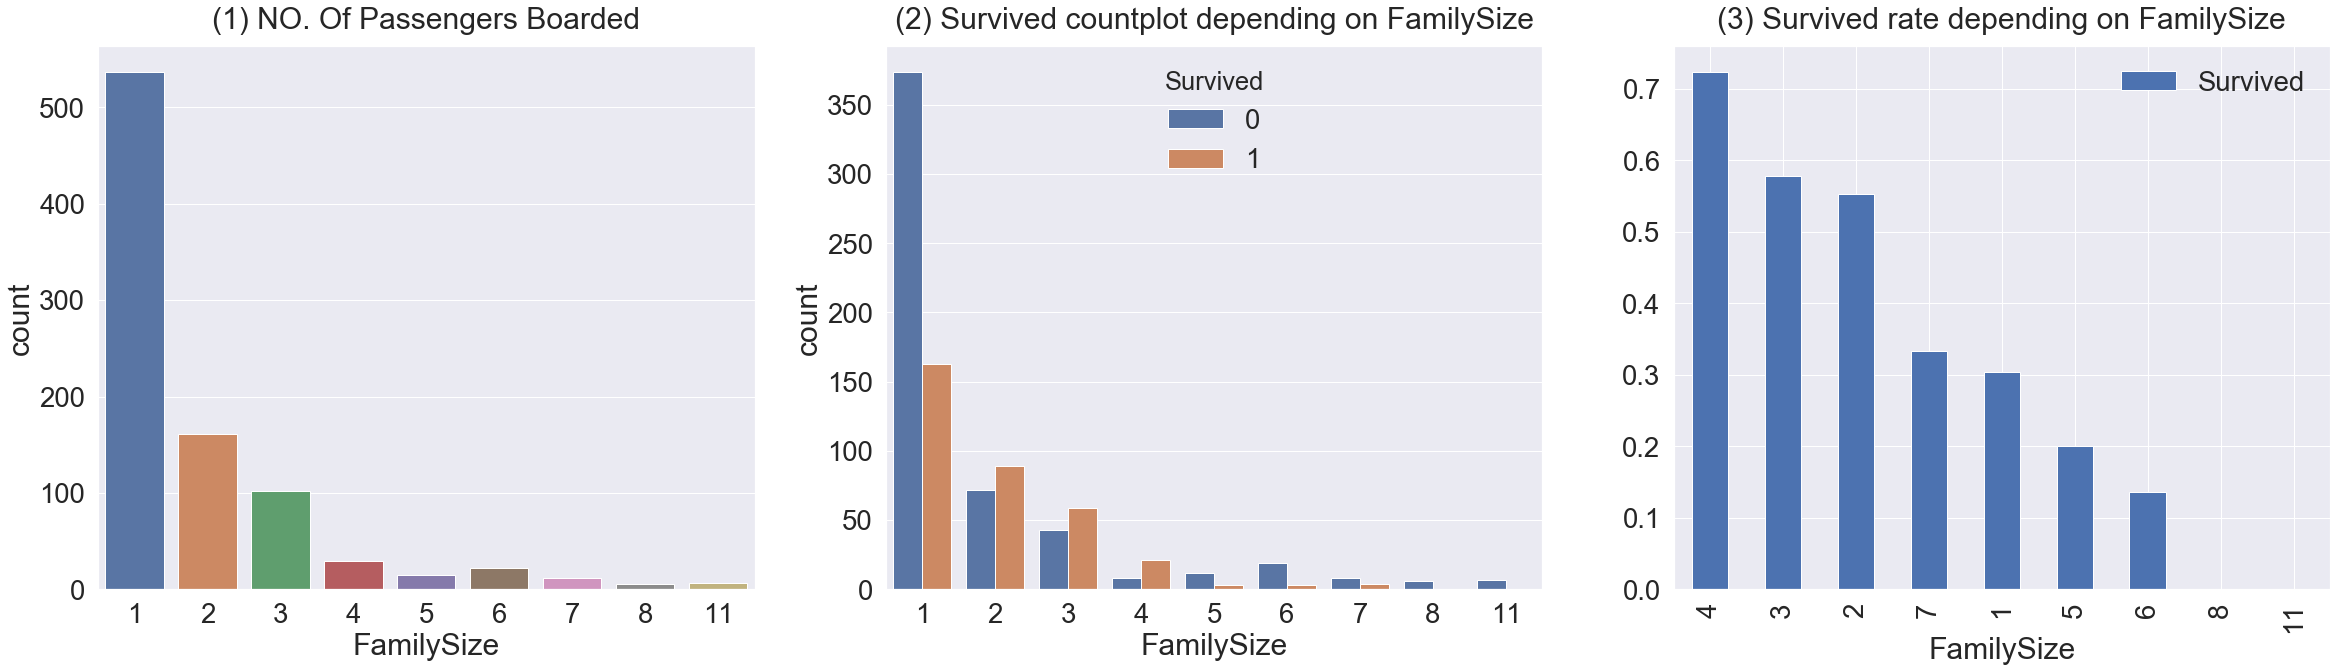

In [57]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) NO. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure (1) - 가족크기가 1~11 까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4 명입니다.

<br>

- Figure (2), (3) - 가족 크기에 따른 생존비교입니다. 가족이 4명인 경우가 가장 ㅎ생존확률이 높습니다. 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아지네요. 가족수가 너무 작아도 (1), 너무 커도(5, 6, 8, 11) 생존 확률이 작네요. 3~4 명 선에서 생존확률이 높은 걸 확인할 수 있습니다.

### 2.8 Fare
- Fare 는 탑승요금이며, contious featrue 입니다.

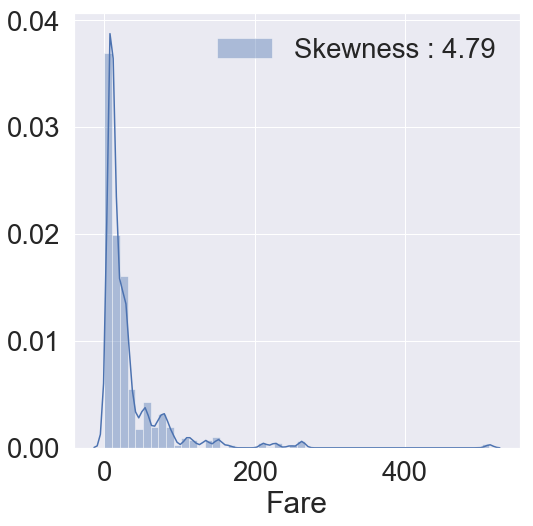

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 보시다시피, distribution 이 매우 비대칭인 것을 알 수 있습니다. (high skewness)
    - 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇 개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.

<br>

- outlier 의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.

<br>

- 여기서 우리는 pandas 의 유용한 기능을 사용할 겁니다. dataFrame 의 특정 columns 에 공통된 작업(함수) 를 적용하고 싶으면 아래의 map, 또는 apply 를 사용하면 매우 손쉽게 적용할 수 있습니다.

<br>

- 우리가 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map 에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다. 매우 유용한 기능이니 꼭 숙지하세요!

In [59]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

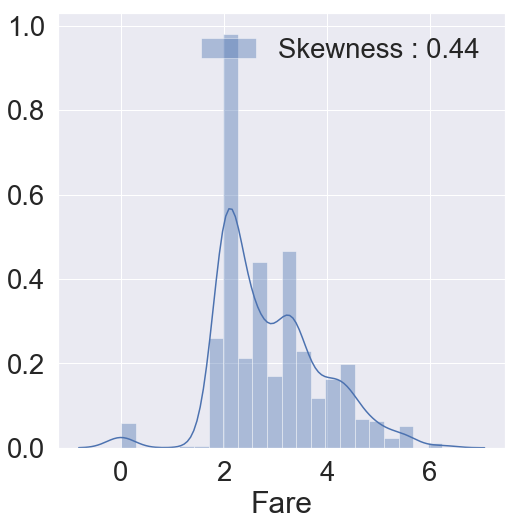

In [60]:
fig, ax = plt.subplots(1, 1, figsize= (8, 8))
g = sns.distplot(df_train['Fare'], color = 'b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

- log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.  
<br>
- 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.

<br>

- 사실 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.

<br>

- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조각을 가하거나, 새로운 feature 를 추가하는 것을 feature engineering 이라고 하는데, 우리는 이제 그것을 살펴볼 것입니다.

### 2.9 Cabin

- 이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.

<br>

- 그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.

In [61]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySze,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,1


### 2.10 Ticket

- 이 feature 는 NaN 은 없습니다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.

In [62]:
df_train['Ticket'].value_counts()

CA. 2343             7
1601                 7
347082               7
347088               6
CA 2144              6
3101295              6
S.O.C. 14879         5
382652               5
347077               4
W./C. 6608           4
2666                 4
17421                4
19950                4
PC 17757             4
LINE                 4
4133                 4
113781               4
349909               4
113760               4
PC 17755             3
13502                3
24160                3
110152               3
C.A. 31921           3
230080               3
363291               3
PC 17582             3
PC 17572             3
345773               3
F.C.C. 13529         3
                    ..
3411                 1
5727                 1
113807               1
343120               1
230434               1
364506               1
C 4001               1
250648               1
7546                 1
250646               1
113804               1
349245               1
695        

## 3. Feature engineering

- 본격적인 feature engineering 을 시작해보겠습니다.
- 가장 먼저, dataset 에 존재하는 null data 를 채우려고 합니다.
- 아무 숫자로 채울 수는 없고, null data 를 포함하는 feature 의 statistics 를 참고하거나, 다른 아이디어를 짜내어 채울 수 있습니다.
- null data 를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지될 수 있기 때문에, 신경써줘야할 부분입니다.
- Feature engineering 은 실제 모델의 학습에 쓰려고 하는 것이므로, train 뿐만 아니라 test 도 똑같이 적용해주어야 합니다.

### 3.1 Fill Null

### 3.1.1 Fill Null in Age using title

- Age 에는 null data 가 177 개나 있습니다. 이를 채울 수 있는 여러 아이디어가 있을 것인데, 여기서 우리는 title + statistics 를 사용해보겠습니다.

- 영어에서는 Miss, Mrr, Mrs 같은 title 이 존재합니다. 각 탑승객의 이름에는 꼭 이런 title 이 들어가게 되는데 이를 사용해보겠습니다.

- pandas series 에는 data 를 string 으로 바꿔주는 str method, 거기에 정규표현식을 적용하게 해주는 extract method 가 있습니다. 이를 사용하여 title 을 쉽게 추출할 수 있습니다.

In [63]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.') # Lets extract the Salutations

df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

- pandas 의 crosstab 을 이용하여 우리가 추출한 Initial 과 Sex 간의 count 를 살펴봅시다.

In [64]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 위 table 을 참고하여, 남자, 여자가 쓰는 initial 을 구분해 보겠습니다. replace 메소드를 사용하면, 특정 데이터 값을 원하는 값으로 치환해줍니다.

In [65]:
df_train['Initial'].replace(['Mile','Mme','Ms','Dr',"major",'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace= True)

df_test['Initial'].replace(['Mile','Mme','Ms','Dr',"major",'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace= True)


In [66]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySze,FamilySize
Initial,,,,,,,,,
Major,493.500000,0.500000,1.000000,48.500000,0.000000,0.000000,3.348378,1.000000,1.000000
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000,4.675000
Miss,408.864130,0.701087,2.298913,21.831081,0.706522,0.543478,3.113425,2.250000,2.250000
Mlle,676.500000,1.000000,1.000000,24.000000,0.000000,0.000000,4.070251,1.000000,1.000000
Mr,455.738140,0.161290,2.387097,32.662162,0.294118,0.151803,2.648862,1.445920,1.445920
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222,1.222222


- 여성과 관계있는 Miss, Mr, Mrs 가 생존율이 높은 것을 볼 수 있습니다.

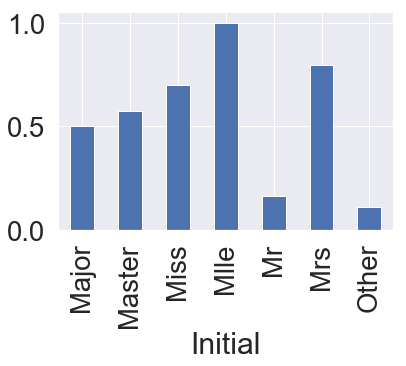

In [68]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()
plt.show()

- 이제 본격적으로 NULL 을 채울 것입니다. null data 를 채우는 방법은 정말 많이 존재합니다. statistics 를 활용하는 방법도 있고, null data 가 없는 데이터를 기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식도 있습니다. 여기서는 statistics 를 활용하는 방법을 사용할 것입니다.

- 여기서 statistics 는 train data 의 것을 의미합니다. 우리는 언제나 test 를 unseen 으로 둔 상태로 놔둬야 하며, train 에서 얻은 statistics 를 기반으로 test 의 null data 를 채워줘야 합니다.

In [69]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySze,FamilySize
Initial,,,,,,,,,
Major,493.500000,0.500000,1.000000,48.500000,0.000000,0.000000,3.348378,1.000000,1.000000
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000,4.675000
Miss,408.864130,0.701087,2.298913,21.831081,0.706522,0.543478,3.113425,2.250000,2.250000
Mlle,676.500000,1.000000,1.000000,24.000000,0.000000,0.000000,4.070251,1.000000,1.000000
Mr,455.738140,0.161290,2.387097,32.662162,0.294118,0.151803,2.648862,1.445920,1.445920
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222,1.222222


- Age 의 평균을 이용해 Null value 를 채우도록 하겠습니다.
- Pandas dataframe 을 다룰 때에는 boolean array를 이용해 indexing 하는 방법이 참으로 편리합니다.
- 아래 코드 첫 줄을 해석하자면, isnull() 이면서 Initial 이 Mr 인 조건을 만족하는 row(탑승객) 의 'Age' 의 값을 33으로 치환한다 입니다.
- loc + boolean + column 을 사용해 값을 치환하는 방법은 자주 쓰이므로 꼭 익숙해집시다.

In [72]:
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Other'), 'Age'] = 46


df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Other'), 'Age'] = 46

### 3.1.2 Fill Null in Embarked

In [73]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


- Embarked 는 Null value 가 2개이고, S 에서 가장 많은 탑승객이 있었으므로, 간단하게 Null 을 S 로 채우겠습니다.

- dataframe 의 fillna method 를 이용하면 쉽게 채울 수 있습니다. 여기서 inplace = True 로 하면 df_train 에 fillna 를 실제로 적용하게 됩니다.

In [75]:
df_train['Embarked'].fillna('S', inplace=True)

### 3.2 Change Age(continuous to categorical)

- Age 는 현재 continuous feature 입니다. 이대로 써도 모델을 세울 수 있지만, Age 를 몇 개의 group 으로 나누어 category 화 시켜줄 소도 있습니다. continuous 를 categorical 로 바꾸면 자칫 information loss 가 생길수도 있습니다만, 본 튜토리얼에서는 다양한 방법을 소개하는 것이 목적이므로 진행하도록 하겠습니다.

<br>

- dataframe 의 indexing 방법인 loc 를 사용하여 직접해줄 수 있고, 아니면 apply 를 사용해 함수를 넣어줄 수 있습니다.
- 나이는 10살 간격으로 나누겠습니다.

In [83]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test['Age']), 'Age_cat'] = 7

In [81]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

- 두 가지 방법이 잘 적용됬다면, 둘 다 같은 결과를 내야합니다.
- 이를 확인하기 위해 Series 간 boolean 비교 후 all() 메소드를 사용합시다. all() 메소드는 모든 값이 True 면 True, 하나라도 False 가 있으면 False 를 줍니다.

In [84]:
print('1번 방법, 2번 방법 둘 다 같은 결과를 내면 True 줘야함 -> ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘 다 같은 결과를 내면 True 줘야함 ->  True


- True 이므로, 둘 중 편한 걸 사용하면 됩니다.
- 이제 중복되는 Age_cat 컬럼과 원래 컬럼 Age를 제거하겠습니다.

In [85]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

### 3.3 Change Initial, Embarked and Sex (string to numerical)

- 현재 Initial 은 Mr, Mrs, Miss, Master, Other 총 5 개로 이루어져 있습니다. 이런 카테고리로 표현되어져 있는 데이터를 모델에 인풋으로 넣어줄 때 우리가 해야할 것은 먼저 컴퓨터가 인식할 수 있도록 수치화 시켜야 합니다.
- map method 를 가지고 간단히 할 수 있습니다.
- 사전 순서대로 정리하며 mapping 하겠습니다.

In [86]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other':4 })
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss':1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

- Embarked 도 C, Q, S 로 이루어져 있습니다. map 을 이용해 바꿔봅시다.
- 그러기 앞서서, 특정 column 에 어떤 값들이 있는 지 확인해보는 방법을 잠깐 살펴보겠습니다. 간단히 unique() 메소드를 쓰거나, value_counts() 를 써서 count 까지 보는 방법이 있습니다.

In [87]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [88]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

- 위 두 방법을 사용해 Embarked 가 S, C, Q 세 가지로 이루어진 것을 볼 수 있습니다. 이제 map 을 사용해봅시다.

In [89]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

- 한번 Null 이 사라졌는지 확인해봅시다. Embarked Column 만 가져온 것은 하나의 pandas 의 Series 객체므로, isnull() 메소드를 사용해 Series 의 값들이 null 인지 아닌지에 대한 boolean 값을 얻을 수 있습니다. 그리고 이것에 any() 를 사용하여, True 가 단 하나라도 있을 시 (null 이 한개라도 있을 시) True 를 반환해주게 됩니다. 우리는 Null 을 S 로 다 바꿔주었으므로 False 를 얻게 됩니다.

In [90]:
df_train['Embarked'].isnull().any()

False

- Sex 도 Female, male 로 이루어져 있습니다. map 을 이용해 바꿔봅시다.

In [91]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

- 이제 각 feature 간의 상관관계를 살펴보려합니다. 두 변수간의 Pearson correlation 을 구하면 (-1, 1) 사이의 값을 얻을 수 있습니다. -1로 갈수록 음의 상관관계, 1로 갈수록 양의 상관관계를 의미하며, 0은 상관관계가 없다는 것을 의미합니다.

<br>

- 우리는 여러 feature 를 가지고 있으니 이를 하나의 matrix 형태로 보면 편할 텐데, 이를 heatmap plot 이라고 하며, dataframe 의 corr() 메소드와 seaborn 을 가지고 편하게 그릴 수 있습니다.

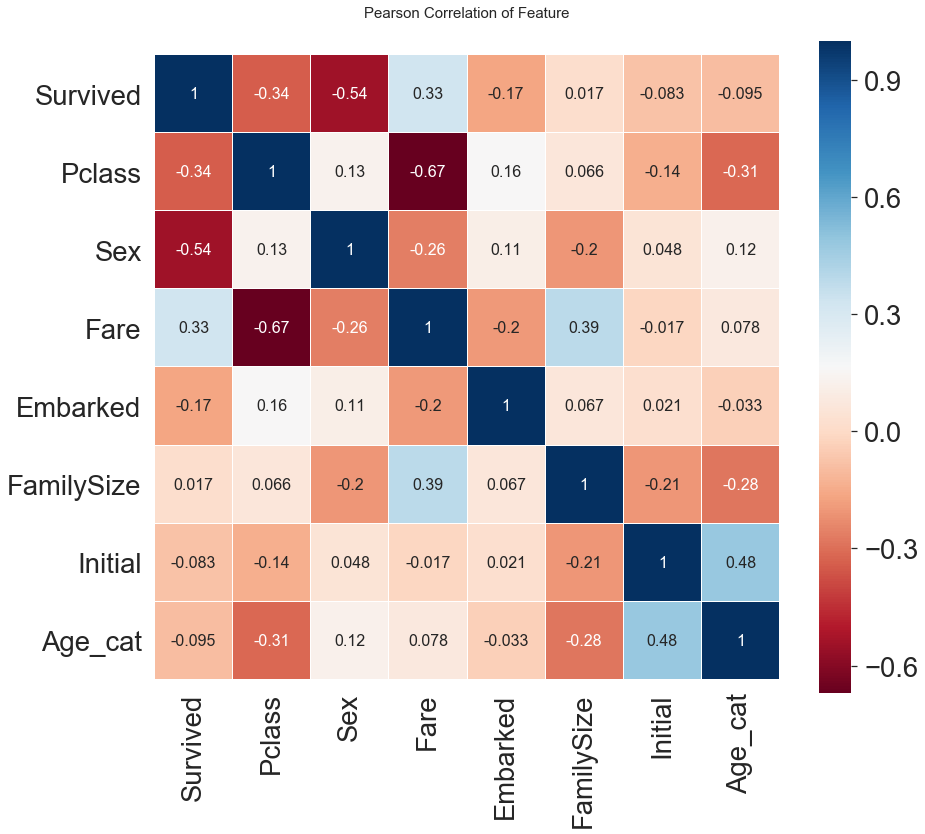

In [93]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]
colormap=plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Feature', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16})

del heatmap_data

- 우리가 EDA 에서 살펴봤듯이, Sex 와 Pclass 가 Survived 에 상관관계가 어느 정도 있음을 볼 수 있습니다.

<br>

- 생각보다 fare 와 Embarked 도 상관관계가 있음을 볼 수 있습니다.

<br>

- 또한 우리가 여기서 얻을 수 있는 정보는 서로 강한 상관관계를 가지는 feature 들이 없다는 것입니다.

<br>

- 이것은 우리가 모델을 학습시킬 때, 불필요한(redundant, superfluous) feature 가 없다는 것을 의미합니다. 1 또는 -1 의 상관관계를 가진 feature A, B 가 있다면, 우리가 얻을 수 있는 정보는 사실 하나일 거니까요.

<br>

- 이제 실제로 모델을 학습시키기 앞서서 data preprocessing (전처리) 을 진행해보겠습니다.

### 3.4 One-hot encoding on Initial and Embarked

- 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding 을 해줄 수 있습니다.

<br>

- 수치화는 간단히 Master ==0, Miss == 1, Mr == 2, Mrs == 3, Other == 4 로 매핑해주는 것을 말합니다.

<br>

- One-hot encoding 은 위 카테고리를 아래와 같이 (0, 1) 로 이루어진 5차원의 벡터로 나타내는 것을 말합니다.

In [94]:
df_train = pd.get_dummies(df_train, columns = ['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix='Initial')

In [95]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySze,FamilySize,Age_cat,Age-cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2,2.0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,2,3,3.0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2,2.0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,2,3,3.0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,1,3,3.0,0,0,1,0,0


In [96]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix='Embarked')

- sklearn 로 Labelencoder + OneHotencoder 를 이용해도 가능합니다.

<br>

- 가끔 category 가 100개가 넘어가는 경우도 있습니다. 이 때 one-hot encoding 을 사용하면 column 이 100개가 생겨, 학습시 매우 버거울 경우가 있습니다. 이런 경우는 다른 방법을 사용하기도 하는데, 이는 다음에 한번 다뤄보겠습니다.

### 3.5 Drop Columns

- 필요한 columns 만 남기고 다 지웁시다.

In [97]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [100]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySze,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,1,3,0,0,1,0,0,0,0,1


In [101]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1.0,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2.0,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1.0,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1.0,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,2.0,2,0,0,0,1,0,0,0,1


- 보시다시피, train 의 Survived feature(target class) 를 빼면 train, test 둘 다 같은 columns 를 가진 걸 확인할 수 있습니다.

## 4. Building machine learning model and prediction using the trained model

In [102]:
# importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

### 4.1 Preparation - Split dataset into train, valid, test set

- 가장 먼저, 학습에 쓰일 데이터와, target label(Survived) 를 분리합니다. drop 을 사용해 간단히 할 수 있습니다.

In [123]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

- 보통 train, test 만 언급되지만, 실제 좋은 모델을 만들기 위해서 우리는 valid set 을 따로 만들어 모델 평가를 해봅니다.

<br>

- train_test_split 을 사용하여 쉽게 train 셋을 분리할 수 있습니다.

In [124]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2021)

### 4.2 Model generation and prediction

In [125]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [126]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 80.22% 정확도로 생존을 맞춤


### 4.3 Feature importance

- 학습된 모델을 feature importance 를 가지게 되는데, 우리는 이것을 확인하며 지금 만든 모델이 어떤 feature 에 영향을 많이 받았는 지 확인할 수 있습니다.

- pandas series 를 이용하면 쉽게 sorting 을 하여 그래프를 그릴 수 있습니다.

In [127]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

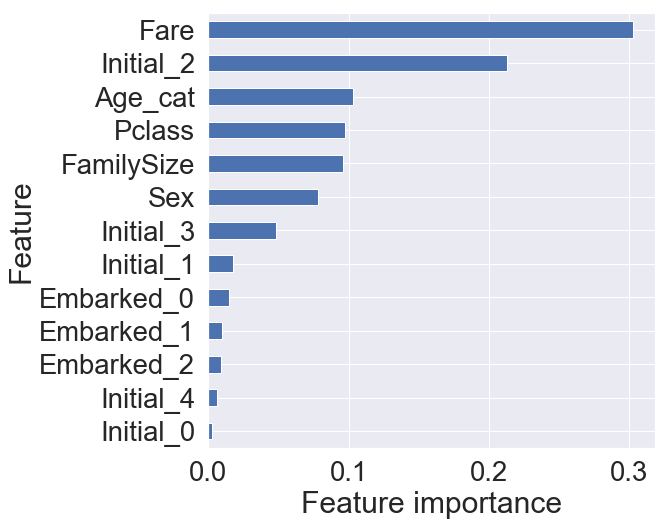

In [131]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending = True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

- 우리가 얻은 모델에서는 Fare 가 가장 큰 영향력을 가지며, 그 뒤로 Initial_2, Age_cat, Pclass 가 차례로 중요도를 가집니다.

<br>

- 사실 feature importance 는 지금 모델에서의 importance 를 나타냅니다. 만약 다른 모델을 사용하게 된다면 feature importance 가 다르게 나올 수 있습니다.

<br>

- 이 feature importance 를 보고 실제로 Fare 가 중요한 feature 일 수 있다고 판단을 내릴 수는 있지만, 이것은 결국 모델에 귀속되는 하나의 결론이므로 통계적으로 좀 더 살펴보긴 해야합니다.

<br>

- feature importance 를 가지고 좀 더 정확도가 높은 모델을 얻기 위해 feature selection 을 할 수도 있고, 좀 더 빠른 모델을 위해 feature 제거를 할 수 있습니다.

### 4.4 Prediction on Test set


- 이제 모델이 학습하지 않았던(보지 않았던) 테스트 셋을 모델에 주어서, 생존여부를 예측해보겠습니다.

<br>

- 이 결과는 실제로 submission 이므로 겨로가는 leaderboard 에서 확인할 수 있습니다.

<br>

- 캐글에서 준 파일, gender_submission.csv 파일을 읽어서 제출 준비를 하겠습니다.

In [132]:
submission = pd.read_csv('gender_submission.csv')

In [133]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [134]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [135]:
submission.to_csv('my_first_submission.csv', index=False)